In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [1]:
print("hello")

hello


In [191]:
data=pd.read_csv("data.csv")
data.head()

,centroid_variance,centroid_mean,rmse_variance,rmse_mean,zcr_variance,zcr_mean,bandwidth_variance,bandwidth_mean,flatness_variance,flatness_mean,...,mfcc_17_variance,mfcc_17_mean,mfcc_18_variance,mfcc_18_mean,mfcc_19_variance,mfcc_19_mean,mfcc_20_variance,mfcc_20_mean,tempo,label
0,152401.081259,1653.780625,0.003616,0.120934,0.001302,0.084075,108697.789503,1884.034435,0.000039,0.004863,...,63.150826,-4.546335,70.648186,1.345781,95.750760,-2.008989,90.934080,2.329324,123.046875,0
1,117287.950896,1663.304855,0.004376,0.120757,0.000894,0.075828,82166.872177,1972.068423,0.000029,0.004677,...,66.729195,-1.876541,85.952705,0.775089,107.195110,-3.361692,58.080692,1.099603,123.046875,0
2,109801.862540,1507.376193,0.002881,0.138261,0.000530,0.069806,86189.509745,1858.716854,0.000013,0.003851,...,71.901430,-0.344178,76.712585,2.072943,78.868890,-2.033274,58.644920,0.170730,123.046875,0
3,241185.934288,1854.540420,0.004757,0.124470,0.001959,0.092981,104285.802477,2067.980707,0.000147,0.008823,...,65.002450,-2.916219,75.018730,0.274257,64.235820,-3.146880,49.436493,2.206044,129.199219,0
4,116825.915907,1643.223903,0.003728,0.136554,0.000611,0.074327,88103.761289,1925.815351,0.000030,0.004797,...,61.626743,-3.177556,55.755768,0.653315,58.807716,-2.824417,75.883870,-1.193538,123.046875,0


In [136]:
data.columns

Index(['centroid_variance', 'centroid_mean', 'rmse_variance', 'rmse_mean',
       'zcr_variance', 'zcr_mean', 'bandwidth_variance', 'bandwidth_mean',
       'flatness_variance', 'flatness_mean', 'rolloff_variance',
       'rolloff_mean', 'mfcc_1_variance', 'mfcc_1_mean', 'mfcc_2_variance',
       'mfcc_2_mean', 'mfcc_3_variance', 'mfcc_3_mean', 'mfcc_4_variance',
       'mfcc_4_mean', 'mfcc_5_variance', 'mfcc_5_mean', 'mfcc_6_variance',
       'mfcc_6_mean', 'mfcc_7_variance', 'mfcc_7_mean', 'mfcc_8_variance',
       'mfcc_8_mean', 'mfcc_9_variance', 'mfcc_9_mean', 'mfcc_10_variance',
       'mfcc_10_mean', 'mfcc_11_variance', 'mfcc_11_mean', 'mfcc_12_variance',
       'mfcc_12_mean', 'mfcc_13_variance', 'mfcc_13_mean', 'mfcc_14_variance',
       'mfcc_14_mean', 'mfcc_15_variance', 'mfcc_15_mean', 'mfcc_16_variance',
       'mfcc_16_mean', 'mfcc_17_variance', 'mfcc_17_mean', 'mfcc_18_variance',
       'mfcc_18_mean', 'mfcc_19_variance', 'mfcc_19_mean', 'mfcc_20_variance',
       'mfcc_

In [137]:
X = data.drop(columns=['label'])
y = data['label']

In [138]:
genre_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [139]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
np.mean(X_scaled),np.std(X_scaled)

(-1.7048464042187873e-17, 1.0)

In [141]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,centroid_variance,centroid_mean,rmse_variance,rmse_mean,zcr_variance,zcr_mean,bandwidth_variance,bandwidth_mean,flatness_variance,flatness_mean,...,mfcc_16_mean,mfcc_17_variance,mfcc_17_mean,mfcc_18_variance,mfcc_18_mean,mfcc_19_variance,mfcc_19_mean,mfcc_20_variance,mfcc_20_mean,tempo
0,-0.553548,-0.561659,0.041373,0.046100,-0.461809,-0.194440,-0.178086,-0.553045,-0.291312,-0.385537,...,-0.728453,-0.299421,-0.316595,-0.146696,0.041232,0.250701,-0.124157,0.117166,0.565048,0.037107
1,-0.627058,-0.549805,0.199205,0.043538,-0.552229,-0.360030,-0.398049,-0.392359,-0.293398,-0.387357,...,0.380612,-0.234161,0.158172,0.122172,-0.068438,0.439378,-0.392873,-0.378360,0.321571,0.037107
2,-0.642730,-0.743868,-0.111242,0.297683,-0.632865,-0.480955,-0.364698,-0.599256,-0.296815,-0.395453,...,-0.187599,-0.139834,0.430671,-0.040158,0.180971,-0.027620,-0.128981,-0.369850,0.137661,0.037107
3,-0.367677,-0.311801,0.278221,0.097437,-0.316365,-0.015595,-0.214665,-0.217292,-0.268857,-0.346739,...,0.057569,-0.265652,-0.026713,-0.069915,-0.164683,-0.268867,-0.350200,-0.508741,0.540639,0.336813
4,-0.628025,-0.574797,0.064699,0.272898,-0.614918,-0.390170,-0.348827,-0.476783,-0.293339,-0.386182,...,0.185919,-0.327216,-0.073186,-0.408325,-0.091840,-0.358357,-0.286142,-0.109836,-0.132455,0.037107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,-0.506308,-0.977695,-0.687682,-0.957426,-0.545262,-0.778726,-0.498493,-0.741381,-0.293196,-0.405367,...,0.304688,-0.114864,-1.326305,0.546036,0.079647,-0.252650,0.288279,-0.414015,0.699015,0.037107
6979,-0.351759,-0.725565,-0.678567,-0.917922,-0.469519,-0.259078,-0.078531,-0.842960,-0.293076,-0.395262,...,0.588725,-0.295661,-1.154738,-0.553044,-0.613488,0.109247,-0.940244,-0.339586,0.640386,0.037107
6980,0.448486,-0.749694,-0.567400,-0.863409,0.059845,-0.042467,0.460048,-1.103751,-0.292837,-0.385449,...,0.561817,-0.491722,0.552742,-0.490586,0.757772,-0.336388,0.245797,-0.473034,0.104632,0.037107
6981,-0.323304,-0.703701,-0.686553,-0.949034,-0.436270,-0.414682,-0.246325,-0.695002,-0.293104,-0.393195,...,0.449194,-0.288236,-0.927911,-0.158345,0.529578,-0.346334,0.066206,-0.328950,0.035213,0.037107


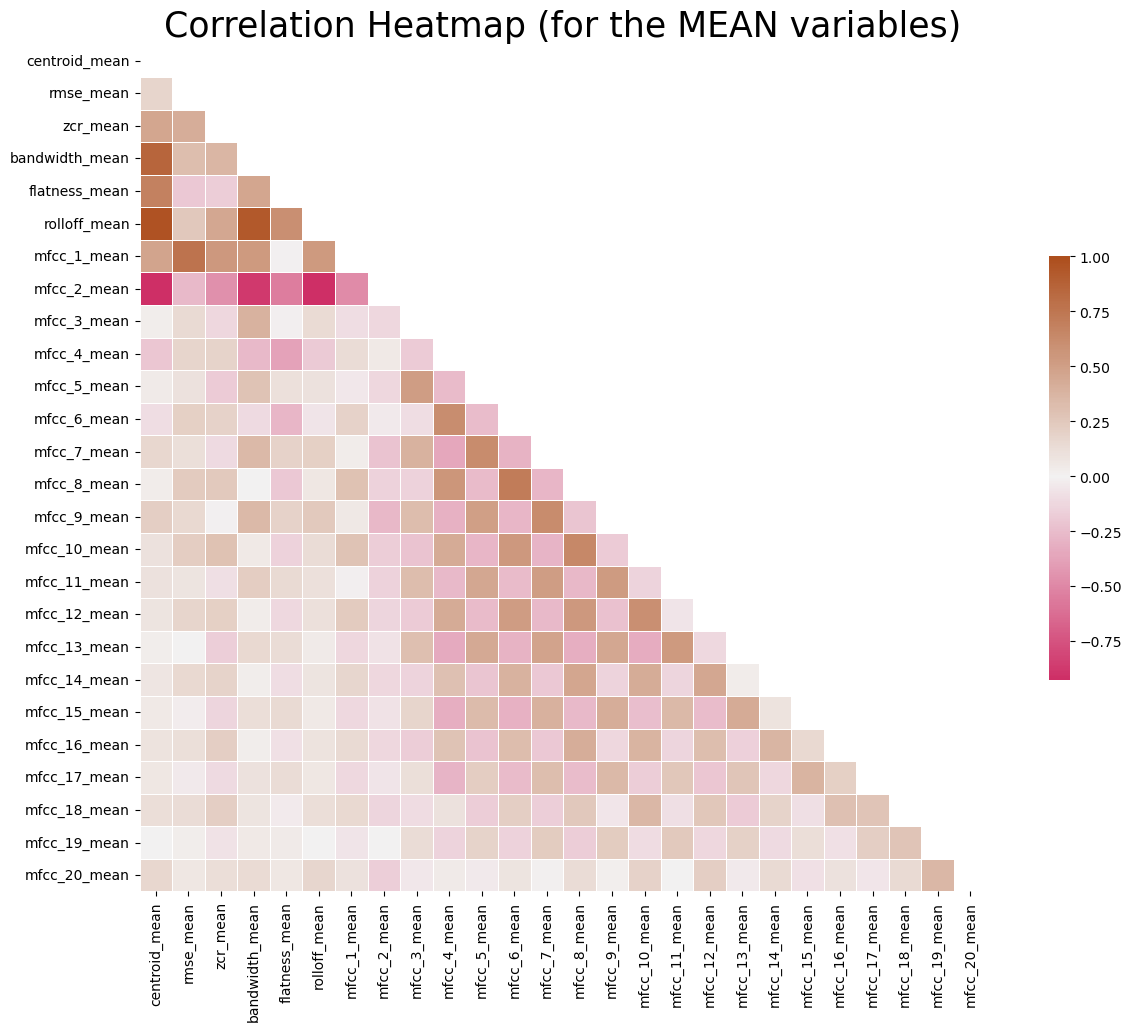

In [142]:
# finding correlation between features (containing mean)
spike_cols = [col for col in X_scaled_df.columns if 'mean' in col]
corr_mean = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mean, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [143]:
row_indices, col_indices = np.where(np.abs(corr_mean) > 0.8)

corr_features_mean = []

# Iterate through the indices and print correlation coefficients greater than 0.8
for i, j in zip(row_indices, col_indices):
    if i < j:  # Only consider the upper triangle to avoid duplicates and self-correlations
        print(f"Correlation between '{corr_mean.columns[i]}' and '{corr_mean.columns[j]}': {corr_mean.iloc[i, j]}")
        corr_features_mean.append(corr_mean.iloc[i,j])         

Correlation between 'centroid_mean' and 'bandwidth_mean': 0.8538441746114108
Correlation between 'centroid_mean' and 'rolloff_mean': 0.9663348243689968
Correlation between 'centroid_mean' and 'mfcc_2_mean': -0.925564829915763
Correlation between 'bandwidth_mean' and 'rolloff_mean': 0.9310211191340096
Correlation between 'bandwidth_mean' and 'mfcc_2_mean': -0.8736866093642288
Correlation between 'rolloff_mean' and 'mfcc_2_mean': -0.9219656300362156


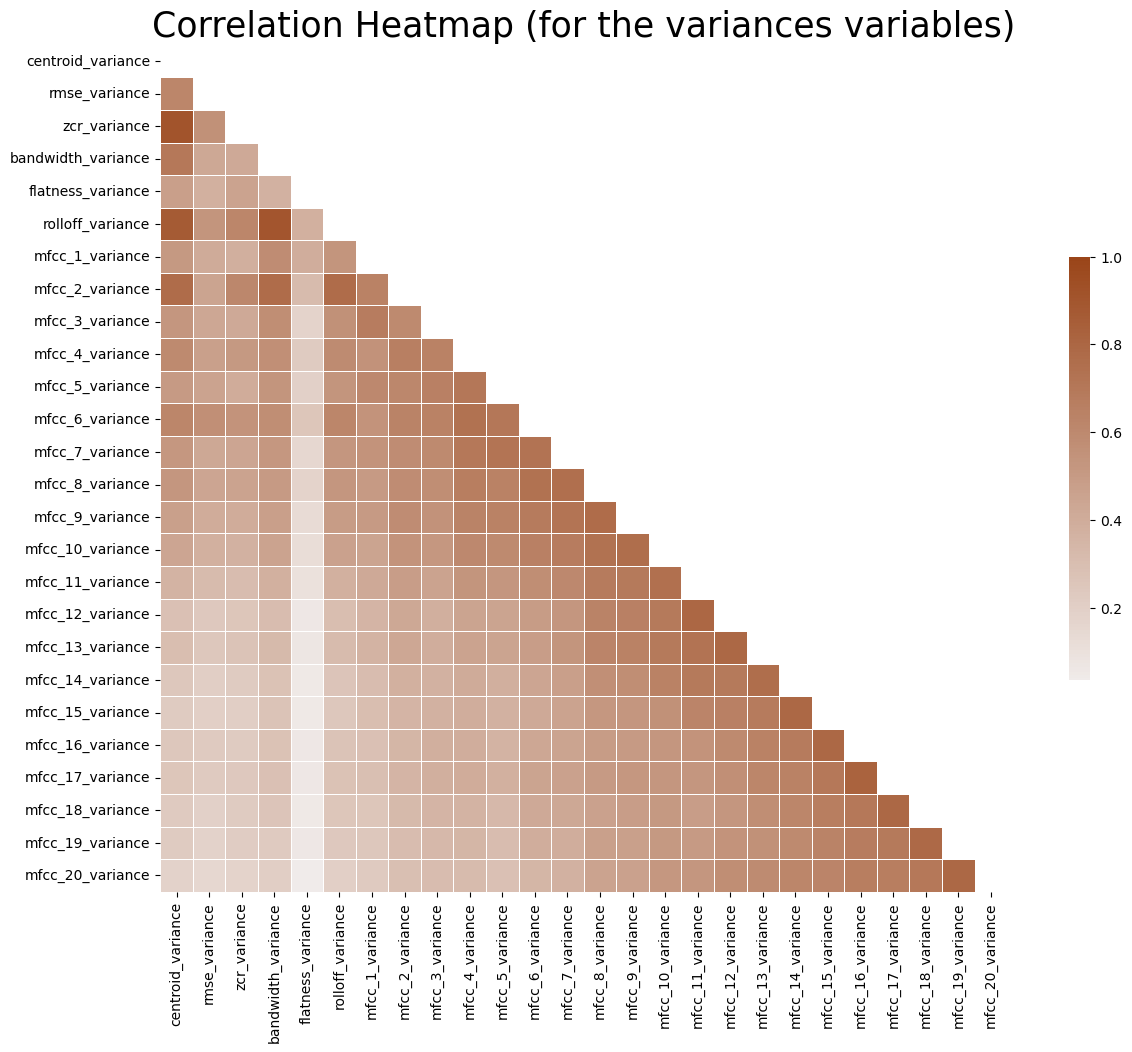

In [144]:
# finding correlation between features (containing variances)
spike_cols = [col for col in X_scaled_df.columns if 'var' in col]
corr_var = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_var, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 40, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_var, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the variances variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [145]:
row_indices, col_indices = np.where(np.abs(corr_var) > 0.8)

corr_features_variances = []

# Iterate through the indices and print correlation coefficients greater than 0.8
for i, j in zip(row_indices, col_indices):
    if i < j:  # Only consider the upper triangle to avoid duplicates and self-correlations
        print(f"Correlation between '{corr_var.columns[i]}' and '{corr_var.columns[j]}': {corr_var.iloc[i, j]}")
        corr_features_variances.append(corr_var.iloc[i,j])             

Correlation between 'centroid_variance' and 'zcr_variance': 0.9060762796258927
Correlation between 'centroid_variance' and 'rolloff_variance': 0.8659351543729821
Correlation between 'bandwidth_variance' and 'rolloff_variance': 0.8999483499755931
Correlation between 'mfcc_11_variance' and 'mfcc_12_variance': 0.8016514184859873
Correlation between 'mfcc_16_variance' and 'mfcc_17_variance': 0.8195441779751569


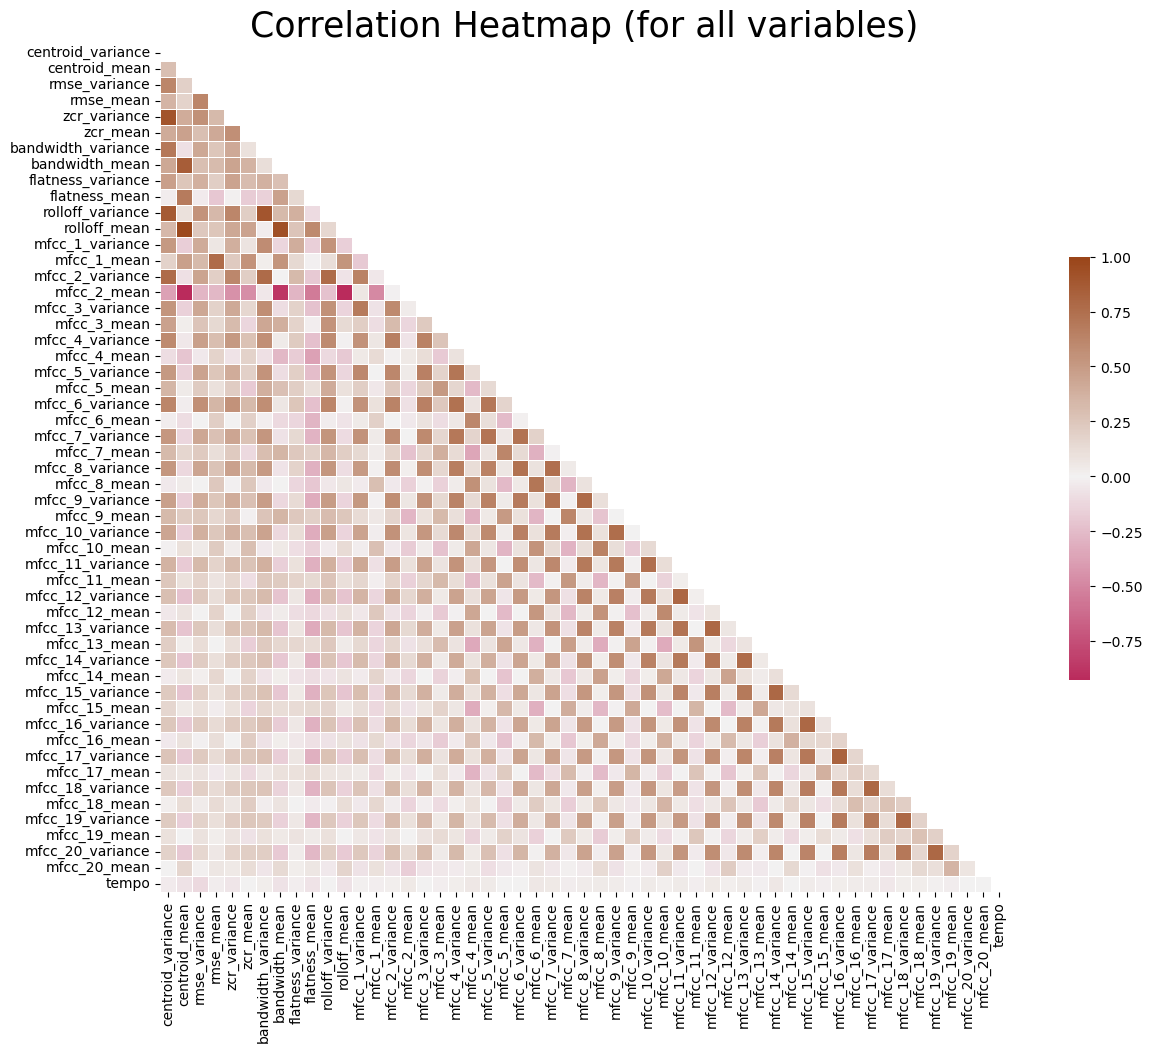

In [146]:
# Finding correlation between all features
corr_all = X_scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_all, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=40, n=5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for all variables)', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [147]:
row_indices, col_indices = np.where(np.abs(corr_all) > 0.8)

corr_features = []

# Iterate through the indices and print correlation coefficients greater than 0.8
for i, j in zip(row_indices, col_indices):
    if i < j:  # Only consider the upper triangle to avoid duplicates and self-correlations
        print(f"Correlation between '{corr_all.columns[i]}' and '{corr_all.columns[j]}': {corr_all.iloc[i, j]}")
        corr_features.append(corr_all.iloc[i,j]) 

Correlation between 'centroid_variance' and 'zcr_variance': 0.9060762796258949
Correlation between 'centroid_variance' and 'rolloff_variance': 0.8659351543729794
Correlation between 'centroid_mean' and 'bandwidth_mean': 0.8538441746114095
Correlation between 'centroid_mean' and 'rolloff_mean': 0.9663348243689929
Correlation between 'centroid_mean' and 'mfcc_2_mean': -0.925564829915764
Correlation between 'bandwidth_variance' and 'rolloff_variance': 0.8999483499755898
Correlation between 'bandwidth_mean' and 'rolloff_mean': 0.9310211191340072
Correlation between 'bandwidth_mean' and 'mfcc_2_mean': -0.8736866093642289
Correlation between 'rolloff_mean' and 'mfcc_2_mean': -0.9219656300362175
Correlation between 'mfcc_11_variance' and 'mfcc_12_variance': 0.8016514184859873
Correlation between 'mfcc_16_variance' and 'mfcc_17_variance': 0.8195441779751578


In [148]:
len(corr_features)

11

In [149]:
X.columns

Index(['centroid_variance', 'centroid_mean', 'rmse_variance', 'rmse_mean',
       'zcr_variance', 'zcr_mean', 'bandwidth_variance', 'bandwidth_mean',
       'flatness_variance', 'flatness_mean', 'rolloff_variance',
       'rolloff_mean', 'mfcc_1_variance', 'mfcc_1_mean', 'mfcc_2_variance',
       'mfcc_2_mean', 'mfcc_3_variance', 'mfcc_3_mean', 'mfcc_4_variance',
       'mfcc_4_mean', 'mfcc_5_variance', 'mfcc_5_mean', 'mfcc_6_variance',
       'mfcc_6_mean', 'mfcc_7_variance', 'mfcc_7_mean', 'mfcc_8_variance',
       'mfcc_8_mean', 'mfcc_9_variance', 'mfcc_9_mean', 'mfcc_10_variance',
       'mfcc_10_mean', 'mfcc_11_variance', 'mfcc_11_mean', 'mfcc_12_variance',
       'mfcc_12_mean', 'mfcc_13_variance', 'mfcc_13_mean', 'mfcc_14_variance',
       'mfcc_14_mean', 'mfcc_15_variance', 'mfcc_15_mean', 'mfcc_16_variance',
       'mfcc_16_mean', 'mfcc_17_variance', 'mfcc_17_mean', 'mfcc_18_variance',
       'mfcc_18_mean', 'mfcc_19_variance', 'mfcc_19_mean', 'mfcc_20_variance',
       'mfcc_

In [150]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42, stratify = y)

In [152]:
X_train.shape,X_test.shape

((4888, 53), (2095, 53))

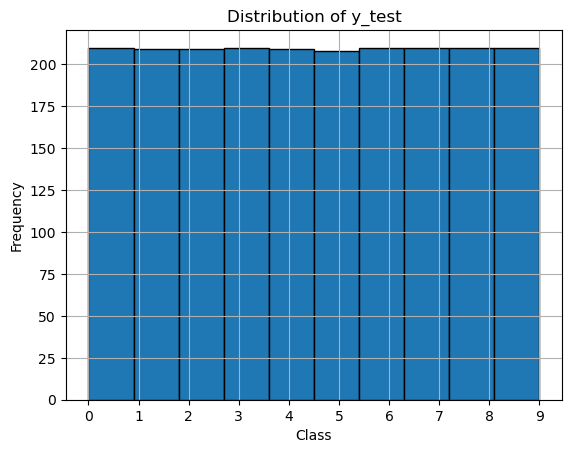

In [153]:
plt.hist(y_test, bins=len(set(y_test)), edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of y_test')
plt.xticks(range(len(set(y_test))))
plt.grid(True)
plt.show()

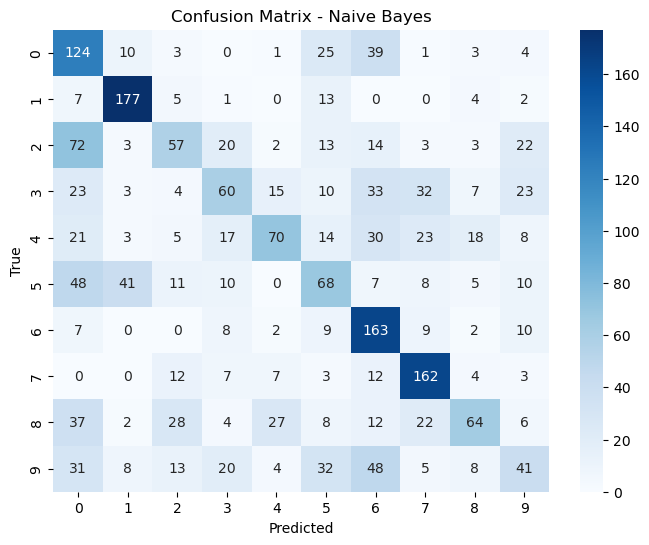

Accuracy:  0.47064 



In [154]:
def naivebayes():
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    preds = nb.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Naive Bayes')
    plt.show()
    
    # Print accuracy
    accuracy = accuracy_score(y_test, preds)
    print("Accuracy: ", round(accuracy, 5), '\n')

naivebayes()


Stochastic Gradient Descent:


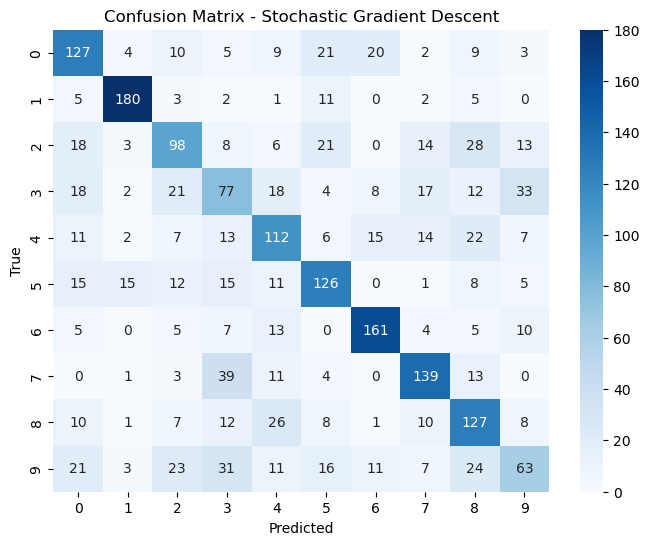

Accuracy:  0.57757 



In [155]:
def sgd():
    sgd = SGDClassifier(max_iter=5000, random_state=0)
    sgd.fit(X_train, y_train)
    preds = sgd.predict(X_test)
    print("Stochastic Gradient Descent:")
    
    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=sgd.classes_, yticklabels=sgd.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Stochastic Gradient Descent')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
sgd()

KNN:


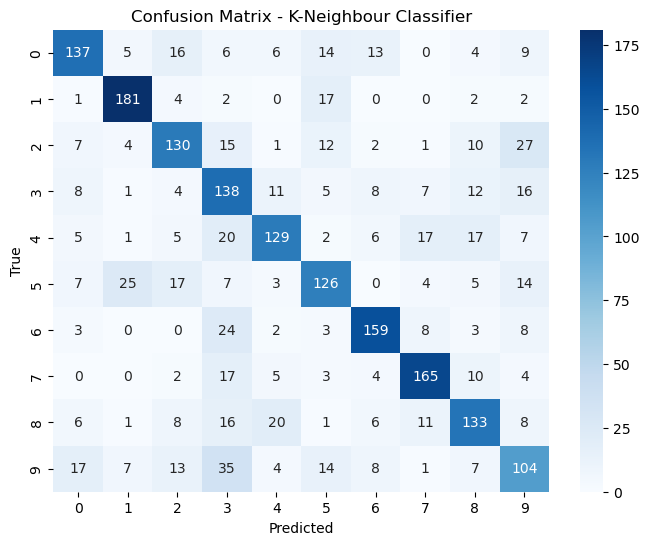

Accuracy:  0.66921 



In [163]:
def KNN():
    knn = KNeighborsClassifier(n_neighbors=19)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    print("KNN:")
    
    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - K-Neighbour Classifier')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
KNN()

Decision trees:


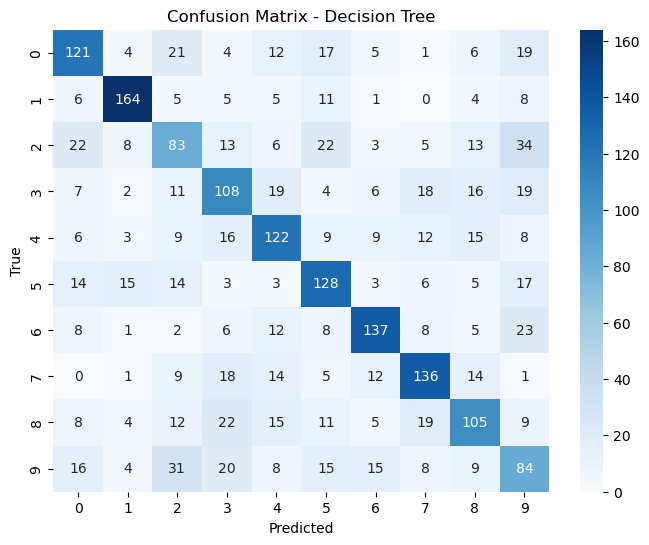

Accuracy:  0.56706 



In [164]:
def Decstree():
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    print("Decision trees:")

    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=tree.classes_, yticklabels=tree.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Decision Tree')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
Decstree()

Random Forest:


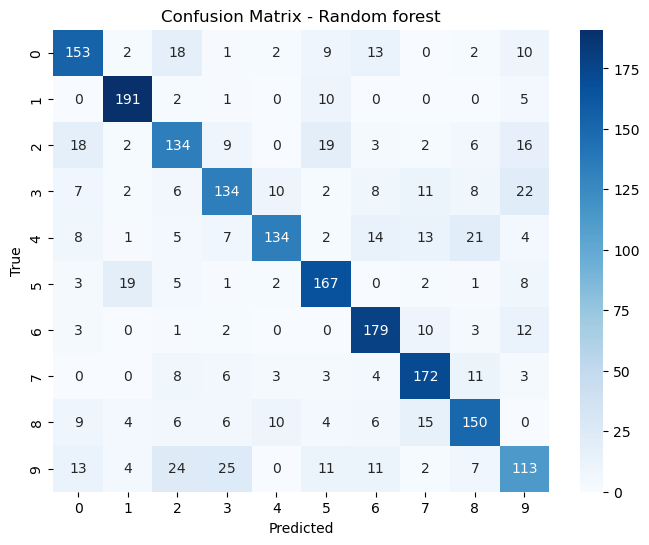

Accuracy:  0.72888 



In [165]:
def RandFrst():
    rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
    rforest.fit(X_train, y_train)
    preds = rforest.predict(X_test)
    print("Random Forest:")

    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=rforest.classes_, yticklabels=rforest.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Random forest')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
RandFrst()

Support Vector Machine:


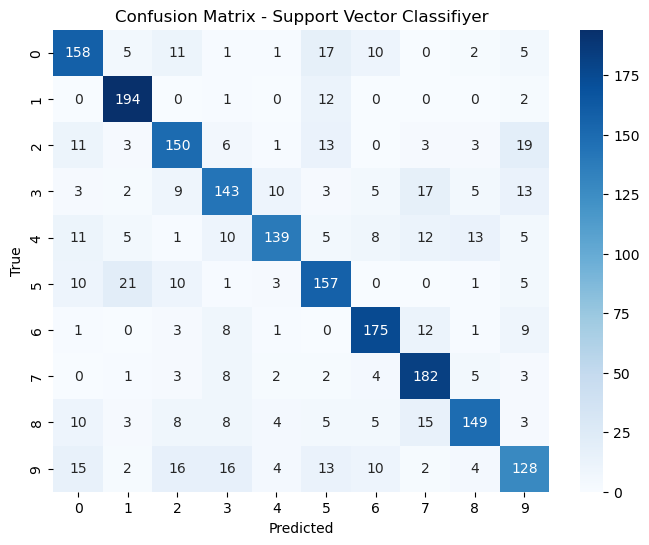

Accuracy:  0.75179 



In [166]:
def smplVCTR():
    svm = SVC(decision_function_shape="ovo")
    svm.fit(X_train, y_train)
    preds = svm.predict(X_test)
    print("Support Vector Machine:")

    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Support Vector Classifiyer')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
smplVCTR()

Logistic Regression:


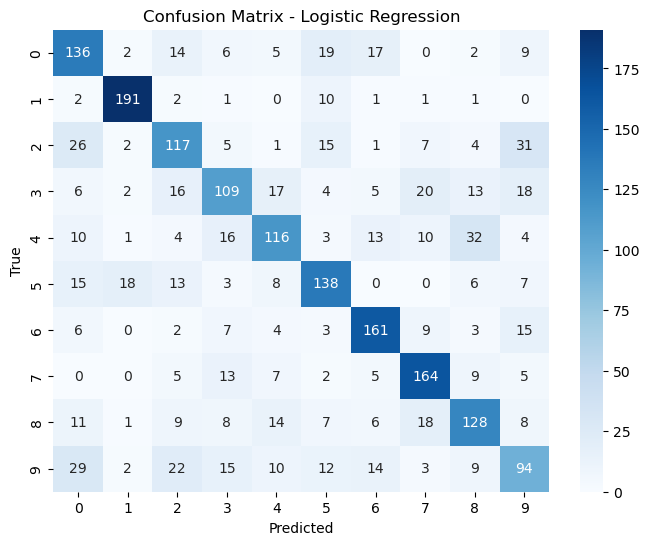

Accuracy:  0.6463 



In [167]:
def LogREG():
    lg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=1000)
    lg.fit(X_train, y_train)
    preds = lg.predict(X_test)
    print("Logistic Regression:")

    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=lg.classes_, yticklabels=lg.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
LogREG()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Nets:


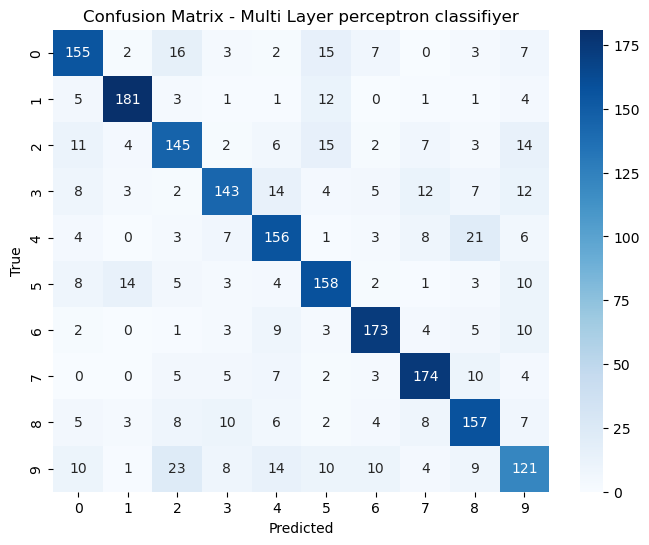

Accuracy:  0.74606 



In [168]:
def Neural():
    nn = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(350, 50), random_state=1)
    nn.fit(X_train, y_train)
    preds = nn.predict(X_test)
    print("Neural Nets:")
    
    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=nn.classes_, yticklabels=nn.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Multi Layer perceptron classifiyer')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
Neural()

Cross Gradient Booster:


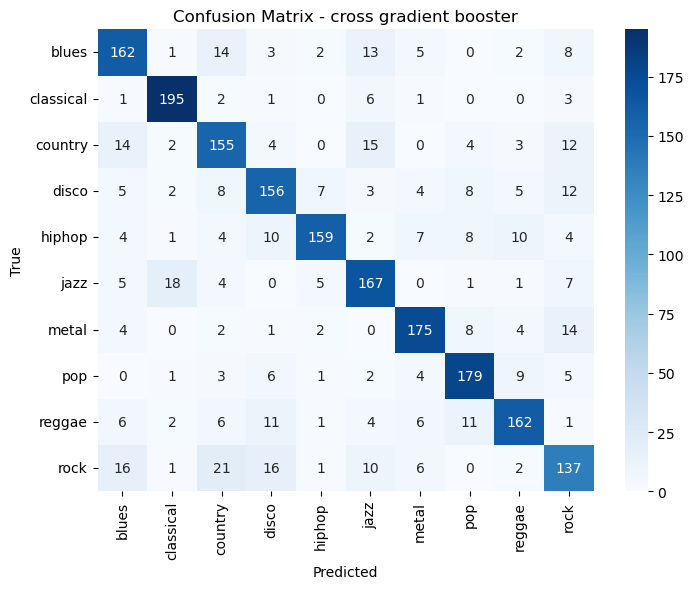

Accuracy:  0.78616 



In [169]:
def Xgradient():
    xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
    xgb.fit(X_train, y_train)
    preds = xgb.predict(X_test)
    print("Cross Gradient Booster:")
    
    cm = confusion_matrix(y_test, preds)
    
    class_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - cross gradient booster')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
Xgradient()

Cross Gradient Booster (Random Forest):


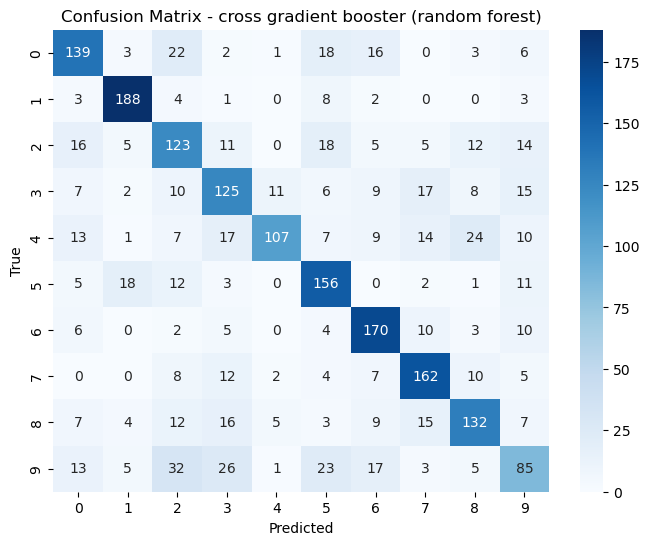

Accuracy:  0.66205 



In [170]:
def XgradForest():
    xgbrf = XGBRFClassifier(objective= 'multi:softmax')
    xgbrf.fit(X_train, y_train)
    preds = xgbrf.predict(X_test)
    print("Cross Gradient Booster (Random Forest):")
    
    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=xgbrf.classes_, yticklabels=xgbrf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - cross gradient booster (random forest)')
    plt.show()
    
    print('Accuracy: ', round(accuracy_score(y_test, preds), 5), '\n')
XgradForest()

out of all the models used cross gradient boosting has the highest accuracy.

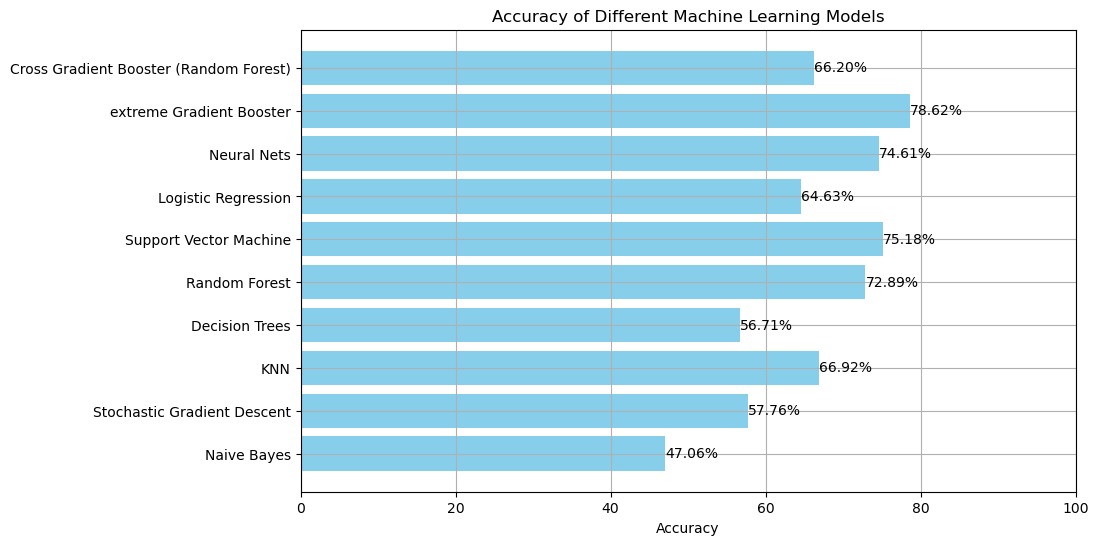

In [193]:
import matplotlib.pyplot as plt

# List of model names
models = ['Naive Bayes', 'Stochastic Gradient Descent', 'KNN', 'Decision Trees', 
          'Random Forest', 'Support Vector Machine', 'Logistic Regression', 
          'Neural Nets', 'extreme Gradient Booster', 'Cross Gradient Booster (Random Forest)']

# List of accuracies
accuracies = [47.064, 57.757, 66.921, 56.706, 72.888, 75.179, 64.63, 74.606, 78.616,  66.205  ]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars=plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.xlim(0, 100)  

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy:.2f}%', 
             va='center', ha='left', color='black')

plt.grid()
plt.show()


In [181]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [182]:
feature_importances = xgb.feature_importances_

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

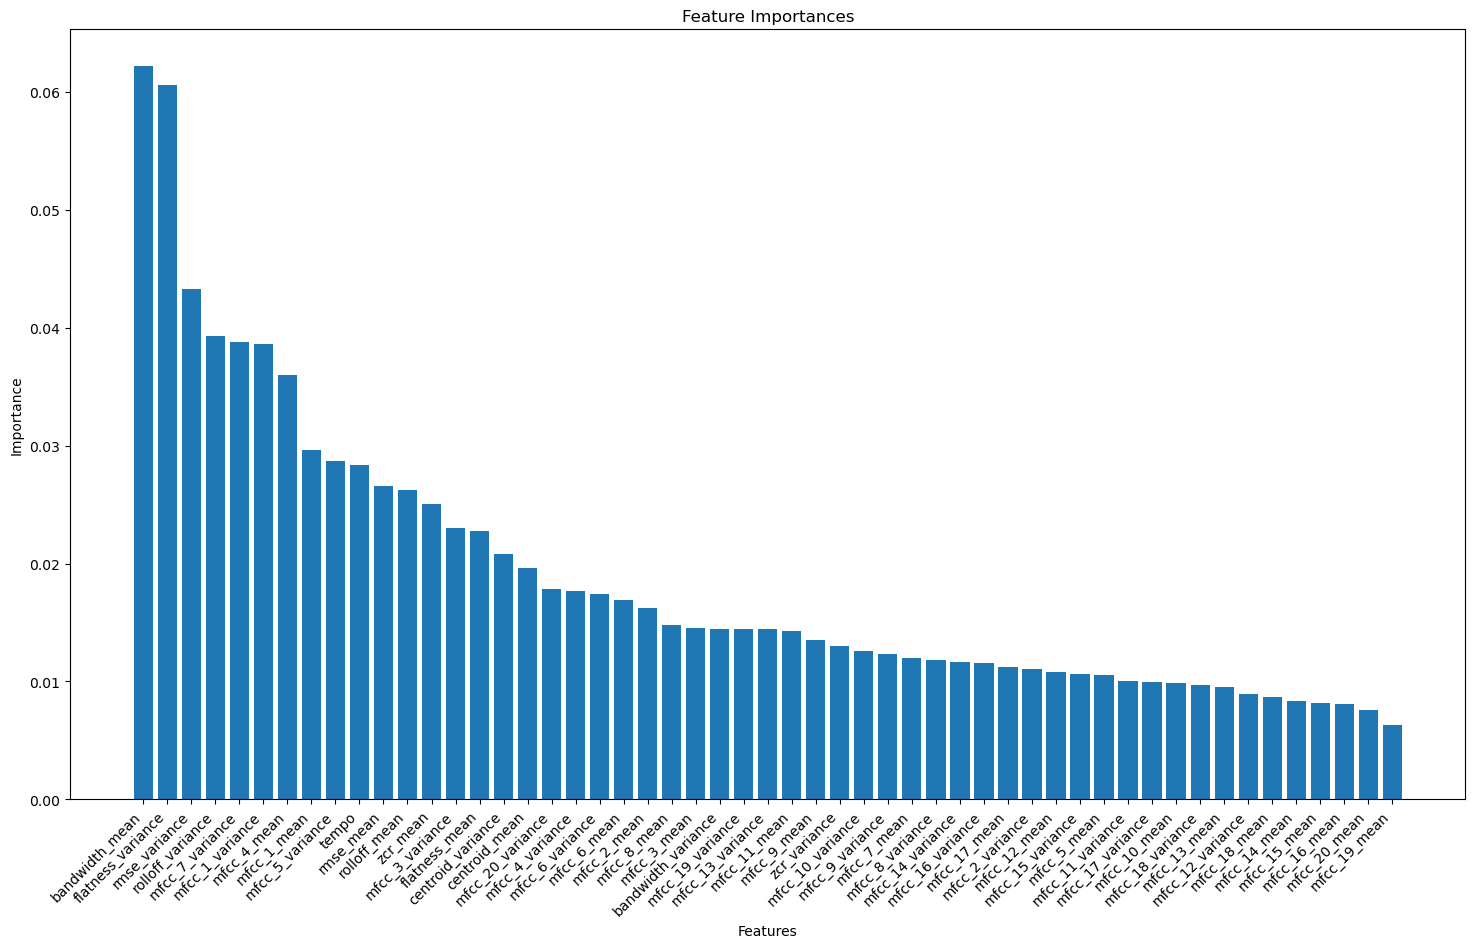

In [183]:
# Plot feature importances
plt.figure(figsize=(18,10))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_idx], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

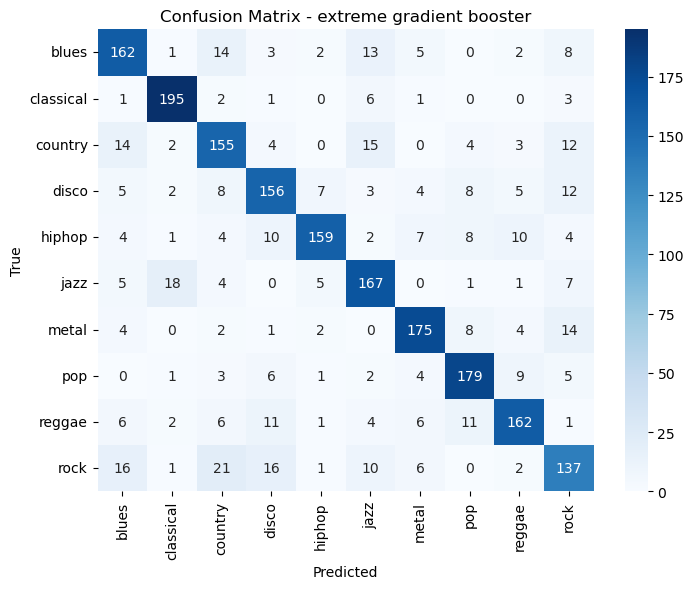

In [184]:
preds=xgb.predict(X_test)
class_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - extreme gradient booster')
plt.show()

In [185]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       210
           1       0.87      0.93      0.90       209
           2       0.71      0.74      0.72       209
           3       0.75      0.74      0.75       210
           4       0.89      0.76      0.82       209
           5       0.75      0.80      0.78       208
           6       0.84      0.83      0.84       210
           7       0.82      0.85      0.83       210
           8       0.82      0.77      0.79       210
           9       0.67      0.65      0.66       210

    accuracy                           0.79      2095
   macro avg       0.79      0.79      0.79      2095
weighted avg       0.79      0.79      0.79      2095



In [186]:
# Make predictions on the training and testing data
train_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_preds) 
test_accuracy = accuracy_score(y_test, test_preds) 

print(train_accuracy)
print(test_accuracy)

0.9997954173486089
0.7861575178997613


In [187]:
import joblib
joblib.dump(xgb, 'xgb_model.pkl')

['xgb_model.pkl']

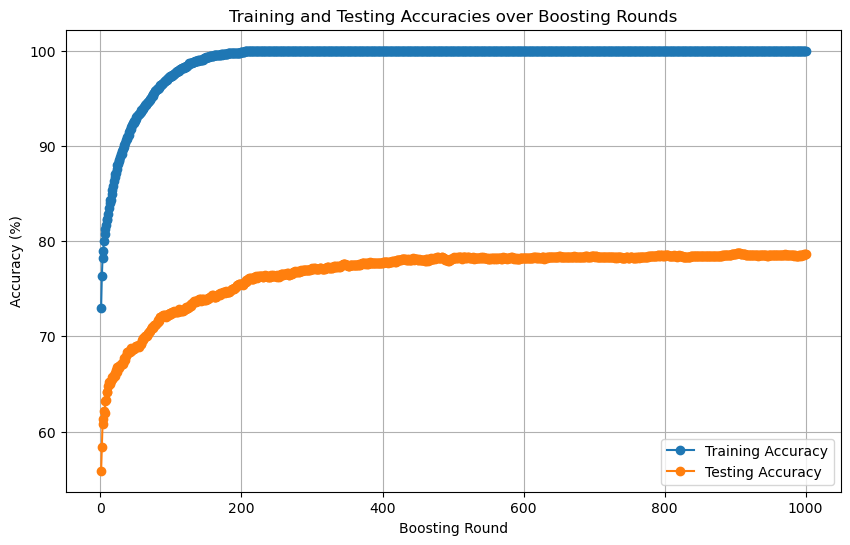

In [192]:
# Initialize and train the XGBoost classifier with 'merror' as the evaluation metric
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, eval_metric='merror')
xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# Extract the evaluation results
results = xgb.evals_result()

# Extract the training and testing error rates for each boosting round
train_error_rates = results['validation_0']['merror']
test_error_rates = results['validation_1']['merror']

# Convert error rates to accuracies and then to percentage
train_accuracies = []
for error_rate in train_error_rates:
    accuracy = (1 - error_rate) * 100
    train_accuracies.append(accuracy)

test_accuracies = []
for error_rate in test_error_rates:
    accuracy = (1 - error_rate) * 100
    test_accuracies.append(accuracy)

# Create an array of boosting rounds (epochs)
epochs = np.arange(1, len(train_accuracies) + 1)

# Plot training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracies over Boosting Rounds')
plt.xlabel('Boosting Round')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()